# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

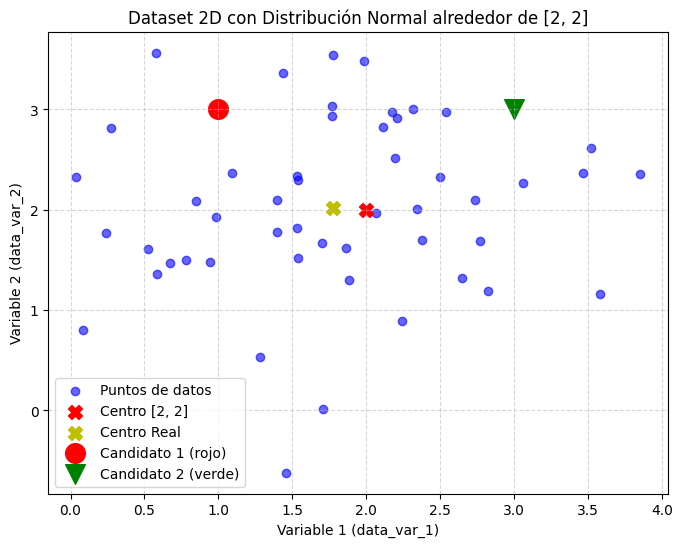

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


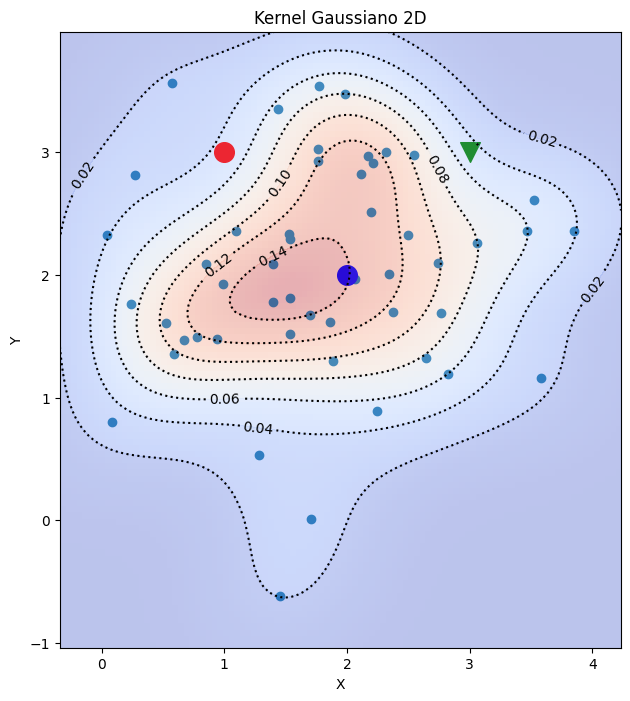

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

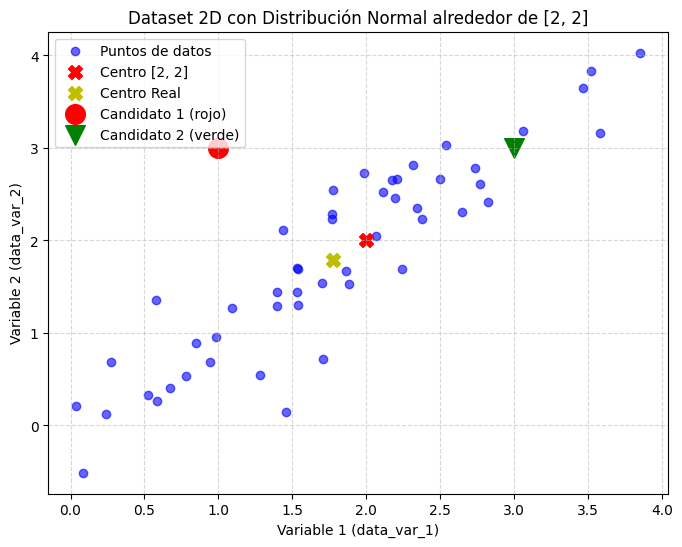

Centro real del cluster: x=1.77, y=1.78
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


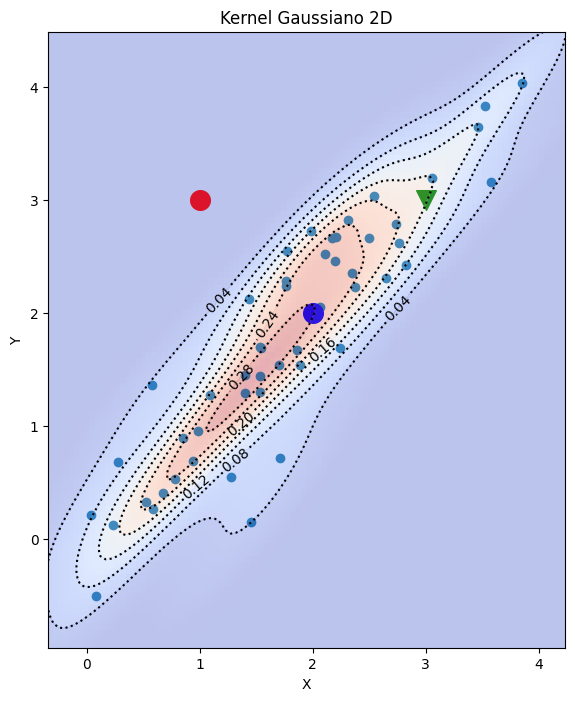

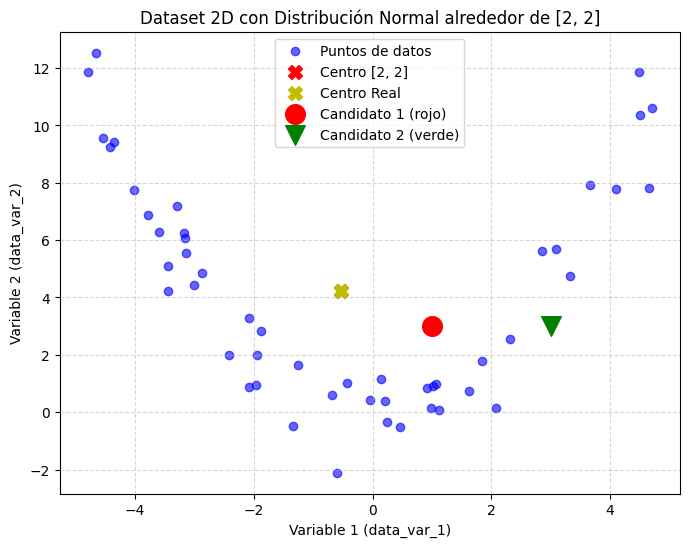

Centro real del cluster: x=-0.54, y=4.23
Centro del cluster utilizado para el ejemplo: x=-0.54, y=4.23


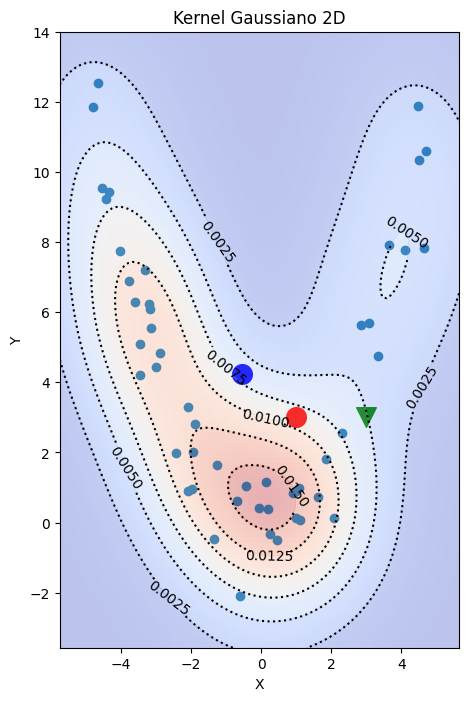

In [66]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(
    factor=np.array([1, 0.5]),
    n_data_points=50,
    ds_center=np.array([2, 2])
)

visualize_scatter(dxr, dyr, np.array([2, 2]), c1, c2)
visualize_dataset(dxr, dyr, np.array([2, 2]), c1, c2)


dx2, dy2 = cargar_datasetRelacionCuadratica(
    coeficientes=np.array([0.5, 0, 0]),
    n_data_points=50,
    rango_x=(-5, 5)
)
ds_center_q = np.array([np.mean(dx2), np.mean(dy2)])

visualize_scatter(dx2, dy2,ds_center_q, c1, c2)
visualize_dataset(dx2, dy2, ds_center_q, c1, c2)


In [67]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [68]:

print(f'Covarianza dataset con distribución normal:\n{np.cov(dx, dy)}\n')

print(f'Covarianza dataset con relación lineal:\n{np.cov(dxr, dyr)}\n')

print(f'Covarianza dataset con relación lineal Grande:\n{np.cov(dxGrande, dyGrande)}\n')

print(f'Covarianza dataset con relación cuadratica:\n{np.cov(dx2, dy2)}\n')


Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal:
[[0.87173739 0.91666484]
 [0.91666484 1.15270333]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 8.34535038 -1.24204787]
 [-1.24204787 15.18168342]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El conjunto de datos que presenta la mayor dependencia lineal entre sus dos variables es el correspondiente a la relación lineal de gran tamaño, ya que muestra el valor más alto de covarianza fuera de la diagonal, lo cual evidencia una relación lineal fuerte y estable entre las variables, además de verse reforzada por el gran número de observaciones

¿Cual es el problema que tiene la covarianza?


el principal problema de la covarianza es que solo mide dependencia lineal y depende de la escala de los datos, por lo que puede ser muy grande simplemente porque las variables tienen valores grandes (como en el dataset grande) y, además, puede dar valores cercanos a cero incluso cuando existe una dependencia clara pero no lineal, como ocurre en el dataset con relación cuadrática.

In [69]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef


print(f'Covarianza dataset con distribución normal:\n{np.corrcoef(dx, dy)}\n')

print(f'Covarianza dataset con relación lineal:\n{np.corrcoef(dxr, dyr)}\n')

print(f'Covarianza dataset con relación lineal Grande:\n{np.corrcoef(dxGrande, dyGrande)}\n')



Covarianza dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]

Covarianza dataset con relación lineal:
[[1.         0.91444789]
 [0.91444789 1.        ]]

Covarianza dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset que presenta la mayor dependencia lineal entre sus dos variables es el de relación lineal, ya que su coeficiente de correlación de Pearson es el más alto (≈ 0.91), lo que indica una relación lineal fuerte y positiva
le sigue el dataset con relación lineal grande (≈ 0.89) que también muestra una dependencia elevada aunque ligeramente menor
mientras que el dataset con distribución normal (≈ 0.11)

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

el coeficiente de correlación de Pearson es la medida más fácil de interpretar para identificar la dependencia entre dos variables, ya que está normalizado entre −1 y 1, no depende de la escala de los datos y permite comparar directamente la fuerza y el sentido de la relación entre distintos datasets.


# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [60]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 1)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [61]:
def distancia_manhattan(p1, p2):
    dist = np.linalg.norm(p2 - p1)
    print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
    return dist

In [24]:
def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    print(f'Distancia chebyshev del punto {p1} al punto {p2} = {dist}')
    return dist


In [25]:
from scipy.spatial import distance

def similitud_coseno(p1, p2):
    dist = 1 - distance.cosine(p1, p2)
    print(f'Similitud de coseno entre {p1} y {p2} = {dist}')
    return dist


In [20]:
def distancia_mahalanobis(p1, p2, cov_inv):
    dist = distance.mahalanobis(p1, p2, cov_inv)
    print(f'Distancia mahalanobis del punto {p1} al punto {p2} = {dist}')
    return dist

In [22]:
def distancia_jaccard(p1, p2):
    dist = distance.jaccard(p1, p2)
    print(f'Distancia jaccard entre {p1} y {p2} = {dist}')
    return dist

In [70]:
ds_center_real = np.array([np.mean(dx), np.mean(dy)])

distancia_euclidiana(ds_center_real, c1)
distancia_euclidiana(ds_center_real, c2)

distancia_manhattan(ds_center_real, c1)
distancia_manhattan(ds_center_real, c2)

distancia_chebyshev(ds_center_real, c1)
distancia_chebyshev(ds_center_real, c2)

similitud_coseno(ds_center_real, c1)
similitud_coseno(ds_center_real, c2)

data = np.vstack([dx, dy]).T
cov = np.cov(data, rowvar=False)
cov_inv = np.linalg.inv(cov)

distancia_mahalanobis(ds_center_real, c1, cov_inv)
distancia_mahalanobis(ds_center_real, c2, cov_inv)

b1 = np.array([1, 0, 1, 1])
b2 = np.array([1, 1, 0, 1])

distancia_jaccard(b1, b2)



Distancia euclidiana del punto [1.77452609 2.01778087] al punto [1 3] = 1.7567452242759072
Distancia euclidiana del punto [1.77452609 2.01778087] al punto [3 3] = 2.207693034788188
Distancia manhattan del punto [1.77452609 2.01778087] al punto [1 3] = 1.2508577416548483
Distancia manhattan del punto [1.77452609 2.01778087] al punto [3 3] = 1.5705224324671165
Distancia chebyshev del punto [1.77452609 2.01778087] al punto [1 3] = 0.9822191295320475
Distancia chebyshev del punto [1.77452609 2.01778087] al punto [3 3] = 1.2254739052561403
Similitud de coseno entre [1.77452609 2.01778087] y [1 3] = 0.9212201531060056
Similitud de coseno entre [1.77452609 2.01778087] y [3 3] = 0.9979490827692092
Distancia mahalanobis del punto [1.77452609 2.01778087] al punto [1 3] = 1.4770847358703076
Distancia mahalanobis del punto [1.77452609 2.01778087] al punto [3 3] = 1.640977445812973
Distancia jaccard entre [1 0 1 1] y [1 1 0 1] = 0.5


np.float64(0.5)

In [71]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset:\n')
ds_center = np.array([np.mean(dx), np.mean(dy)])

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)
dist_cheb2 = distancia_chebyshev(c2, ds_center)


print('Distancias segundo dataset:\n')
ds_center = np.array([np.mean(dxr), np.mean(dyr)])

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)
dist_cheb2 = distancia_chebyshev(c2, ds_center)


print('Distancias tercer dataset:\n')
ds_center = np.array([np.mean(dx2), np.mean(dy2)])

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)
dist_cheb2 = distancia_chebyshev(c2, ds_center)

print('Distancias cuarto dataset:\n')
ds_center = np.array([np.mean(dxGrande), np.mean(dyGrande)])

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)
dist_cheb2 = distancia_chebyshev(c2, ds_center)

🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
Distancia chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Distancia chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
Distancias segundo dataset:

Distancia euclidiana del punto [1 3] al punto [1.77452609 1.78341653] = 1.9911095647660237
Distancia euclidiana del punto [3 3] al punto [1.77452609 1.78341653] = 2.4420573752783046
Distancia manhattan del punto [1 3] al punto [1.77452609 1.78341653] = 1.4422087265615695
Distancia manhattan del punto [3 3] al punto [1.77452609 1.78341653

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
¿Qué medidas de disimilitud son de un punto a una distribución?

Las distancias Euclidiana, Manhattan y Chebyshev son medidas de disimilitud entre dos puntos, ya que calculan la separación geométrica directa considerando únicamente sus coordenadas. En cambio, la distancia de Mahalanobis es una medida de un punto respecto a una distribución, porque utiliza la matriz de covarianza del conjunto de datos para ponderar las distancias según la variabilidad y correlación de las variables. La similitud de coseno compara la orientación entre vectores, no la forma de la distribución, mientras que Jaccard se aplica a conjuntos o vectores binarios y no modela distribuciones continuas

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí, la distancia de Mahalanobis tiene en cuenta la distribución real de los datos, ya que incorpora la matriz de covarianza, lo que le permite ajustar la distancia según la dispersión y correlación entre las variables

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [64]:
import itertools as it

# TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0]], X[pair[1]], mC)
        else:
            mD[pair] = distancia(X[pair[0]], X[pair[1]])
    return mD


Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

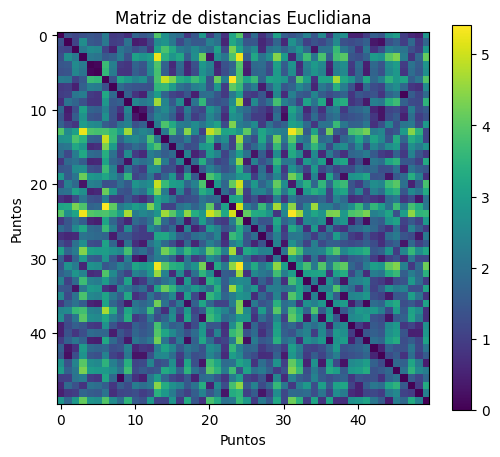

Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.0055959663556684
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1809197365948756
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.1189602659242786
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.1929165981466607
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.1088732090165059
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.8698767762294795
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.8142411451295305
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 1.0420982457379435
Distancia mahalanobis del

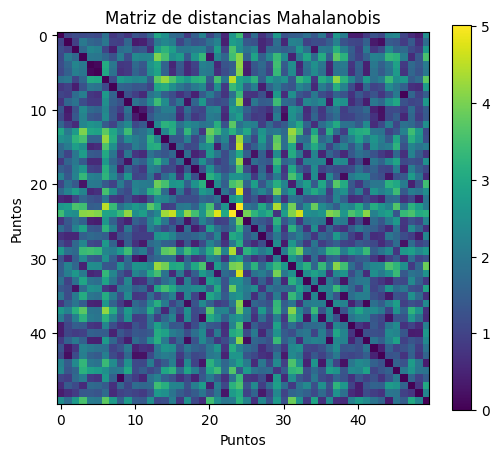

In [65]:
import matplotlib.pyplot as plt

X = np.vstack([dx, dy]).T

Ma_euclidiana = matriz_distancias(X, distancia_euclidiana)
print('Matriz de distancias (Euclidiana):\n', Ma_euclidiana)

plt.figure(figsize=(6, 5))
plt.imshow(Ma_euclidiana)
plt.colorbar()
plt.title('Matriz de distancias Euclidiana')
plt.xlabel('Puntos')
plt.ylabel('Puntos')
plt.show()

mC = np.linalg.inv(np.cov(X, rowvar=False))

Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz de distancias (Mahalanobis):\n', Ma_mahalanobis)

plt.figure(figsize=(6, 5))
plt.imshow(Ma_mahalanobis)
plt.colorbar()
plt.title('Matriz de distancias Mahalanobis')
plt.xlabel('Puntos')
plt.ylabel('Puntos')
plt.show()



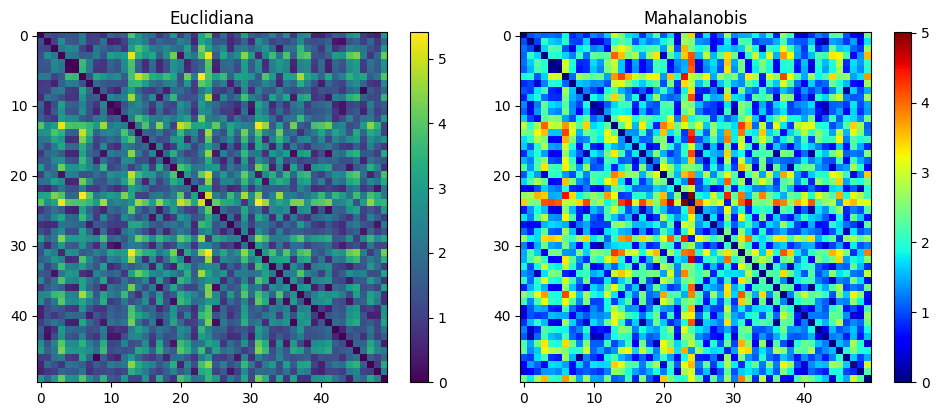

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))


ax[0].imshow(Ma_euclidiana)
ax[0].set_title('Euclidiana')
plt.colorbar(ax[0].images[0], ax=ax[0])

ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')
plt.colorbar(ax[1].images[0], ax=ax[1])

plt.tight_layout()
plt.show()


In [36]:
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    mS = 1 / (1 + mD)

    return mS


Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

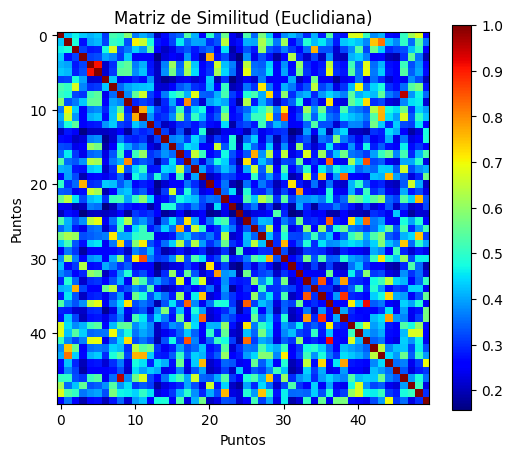

In [37]:
Ma_similitud = matriz_similitud(X, distancia_euclidiana)

print('Matriz de similitud:\n', Ma_similitud)

plt.figure(figsize=(6, 5))
plt.imshow(Ma_similitud, cmap='jet')
plt.colorbar()
plt.title('Matriz de Similitud (Euclidiana)')
plt.xlabel('Puntos')
plt.ylabel('Puntos')
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

El gráfico de la matriz de similitud es más fácil de interpretar que el de la matriz de disimilitud, ya que utiliza una escala intuitiva en la que los valores altos indican mayor parecido entre los elementos y los valores bajos menor similitud. Esto facilita la identificación visual de patrones, grupos o bloques de elementos similares


# 🚀 ¡TALLER FINALIZADO!"